In [225]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
import xgboost as xgb

(576, 6)
(200, 5)
Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')
Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation'],
      dtype='object')


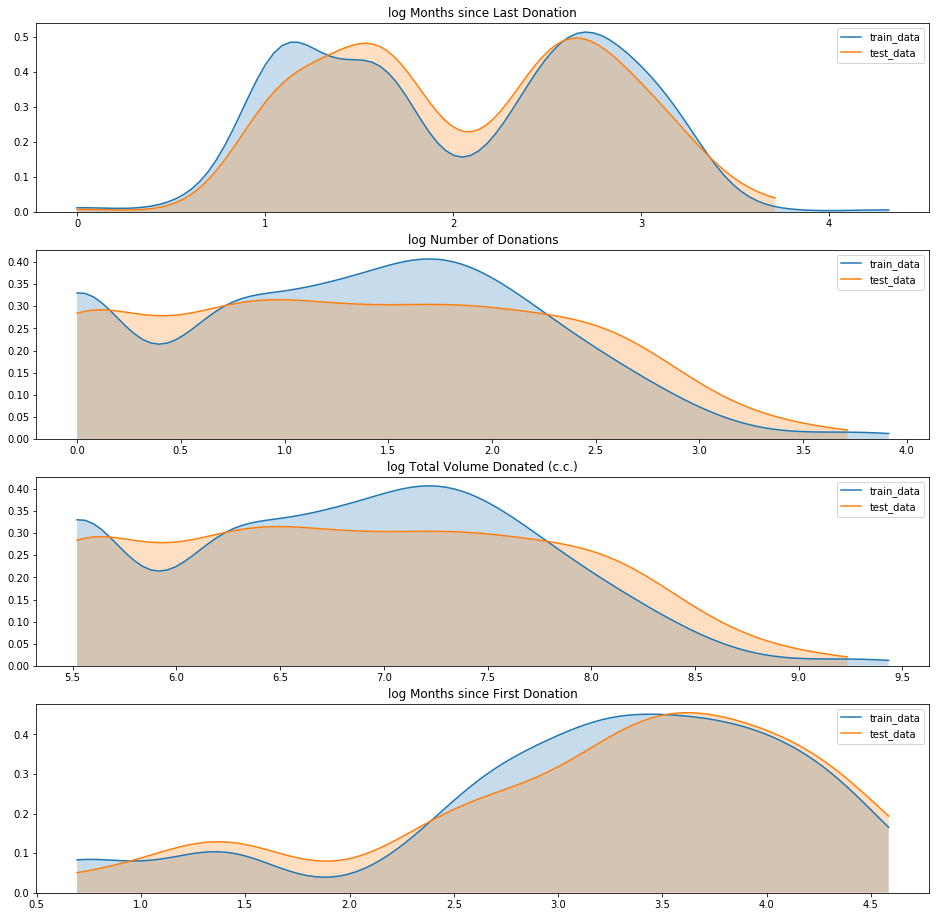

In [181]:
test_data = pd.read_csv('blood-test.csv')
train_data = pd.read_csv('blood-train.csv')
print (train_data.shape)
print (test_data.shape)
print(train_data.columns)
print(test_data.columns)
test_data.head()
#train_data[train_data.isnull().any(axis=1)==True] # Check for Null values in training data
#test_data[test_data.isnull().any(axis=1)==True] # Check for Null values in test data
#train_data.describe()
#train_data.iloc[:,1:5].corr()
train_data.pivot_table(index= train_data.iloc[:,-1], values=train_data.iloc[:,0:4], aggfunc=np.mean)


train_data['log Months since Last Donation'] = train_data['Months since Last Donation'].apply(lambda x: np.log(x+1))
test_data['log Months since Last Donation'] = test_data['Months since Last Donation'].apply(lambda x: np.log(x+1))

train_data['log Number of Donations'] = train_data['Number of Donations'].apply(lambda x: np.log(x))
test_data['log Number of Donations'] = test_data['Number of Donations'].apply(lambda x: np.log(x))

train_data['log Total Volume Donated (c.c.)'] = train_data['Total Volume Donated (c.c.)'].apply(lambda x: np.log(x))
test_data['log Total Volume Donated (c.c.)'] = test_data['Total Volume Donated (c.c.)'].apply(lambda x: np.log(x))

train_data['log Months since First Donation'] = train_data['Months since First Donation'].apply(lambda x: np.log(x))
test_data['log Months since First Donation'] = test_data['Months since First Donation'].apply(lambda x: np.log(x))



f = plt.figure(figsize=(16,16))
ax1 = f.add_subplot(4,1,1)
ax2 = f.add_subplot(4,1,2)
ax3 = f.add_subplot(4,1,3)
ax4 = f.add_subplot(4,1,4)

ax1.set_title('log Months since Last Donation')
sns.kdeplot(train_data['log Months since Last Donation'], shade=True, cut=0, label='train_data',ax=ax1)
sns.kdeplot(test_data['log Months since Last Donation'], shade=True, cut=0, label='test_data',ax=ax1)

ax2.set_title('log Number of Donations')
sns.kdeplot(train_data['log Number of Donations'], shade=True, cut=0, label='train_data',ax=ax2)
sns.kdeplot(test_data['log Number of Donations'], shade=True, cut=0, label='test_data',ax=ax2)

ax3.set_title('log Total Volume Donated (c.c.)')
sns.kdeplot(train_data['log Total Volume Donated (c.c.)'], shade=True, cut=0, label='train_data',ax=ax3)
sns.kdeplot(test_data['log Total Volume Donated (c.c.)'], shade=True, cut=0, label='test_data',ax=ax3)

ax4.set_title('log Months since First Donation')
sns.kdeplot(train_data['log Months since First Donation'], shade=True, cut=0, label='train_data',ax=ax4)
sns.kdeplot(test_data['log Months since First Donation'], shade=True, cut=0, label='test_data',ax=ax4)
plt.show()

In [239]:
train_data = pd.read_csv('blood-train.csv')
train_data.pivot_table(index= train_data.iloc[:,-1], values=train_data.iloc[:,0:4], aggfunc=np.mean)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Unnamed: 0
Made Donation in March 2007,,,,
0,10.636986,4.716895,1179.223744,368.933790
1,5.637681,7.681159,1920.289855,390.224638


In [238]:
test_data = pd.read_csv('blood-test.csv')
train_data = pd.read_csv('blood-train.csv')

train_data['log Months since Last Donation'] = train_data['Months since Last Donation'].apply(lambda x: np.log(x+1))
test_data['log Months since Last Donation'] = test_data['Months since Last Donation'].apply(lambda x: np.log(x+1))

train_data['log Number of Donations'] = train_data['Number of Donations'].apply(lambda x: np.log(x))
test_data['log Number of Donations'] = test_data['Number of Donations'].apply(lambda x: np.log(x))

train_data['log Total Volume Donated (c.c.)'] = train_data['Total Volume Donated (c.c.)'].apply(lambda x: np.log(x))
test_data['log Total Volume Donated (c.c.)'] = test_data['Total Volume Donated (c.c.)'].apply(lambda x: np.log(x))

train_data['log Months since First Donation'] = train_data['Months since First Donation'].apply(lambda x: np.log(x))
test_data['log Months since First Donation'] = test_data['Months since First Donation'].apply(lambda x: np.log(x))

train_data['log Made Donation in March 2007'] = train_data['Made Donation in March 2007'].apply(lambda x: np.log(x))


X = train_data.iloc[:,6:10]
#X = train_data[['log Months since Last Donation', 'log Number of Donations','Total Volume Donated (c.c.)', 'log Months since First Donation']]
y = train_data['Made Donation in March 2007']


best_lr = LogisticRegression(C=0.01,random_state=12345)
best_lr.fit(X,y)
best_lr_probs = best_lr.predict_proba(X)[:,1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y, best_lr_probs)
print ('Logistic Regression')
print(cross_val_score(best_lr,X,y,cv=kf_10).mean())

best_svm = SVC(C=0.1,cache_size=200,probability=True,random_state=12345)
best_svm.fit(X,y)
best_svm_probs = best_svm.predict_proba(X)[:,1]
svm_fpr, svm_tpr, svm_thresholds = roc_curve(np.ravel(y), best_svm_probs)
print ('SVM')
print(cross_val_score(best_svm, X,y,cv=kf_10).mean())

best_ada = AdaBoostClassifier(learning_rate=0.5,n_estimators=25,random_state=12345)
best_ada.fit(X,y)
best_ada_probs = best_ada.predict_proba(X)[:,1]
ada_fpr, ada_tpr, ada_thresholds = roc_curve(np.ravel(y), best_ada_probs)
print ('ADA')
print(cross_val_score(best_ada, X,y,cv=kf_10).mean())


best_rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=9,min_samples_split=3)
best_rf.fit(X,y)
best_rf_probs = best_rf.predict_proba(X)[:,1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y, best_rf_probs)
print ('RF')
print(cross_val_score(best_rf,X,y,cv=kf_10).mean())

best_xgb = xgb.XGBClassifier(base_score=0.5, learning_rate=0.01, n_estimators=50, max_depth=3)
best_xgb.fit(X,y)
best_xgb_probs = best_xgb.predict_proba(X)[:,1]
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(np.ravel(y), best_xgb_probs)
cross_val_score(best_xgb,X,np.ravel(y),cv=kf_10).mean()


/home/jarstone/.virtualenvs/myvirtualenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jarstone/.virtualenvs/myvirtualenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jarstone/.virtualenvs/myvirtualenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jarstone/.virtualenvs/myvirtualenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jarstone/.virtualenvs/myvirtualenv/lib/python3.6/site-packages/skl

Logistic Regression
0.7604355716878403
SVM


/home/jarstone/.virtualenvs/myvirtualenv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jarstone/.virtualenvs/myvirtualenv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jarstone/.virtualenvs/myvirtualenv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/

0.7604355716878403
ADA
0.7777676950998185
RF
0.7863883847549908


0.7759830611010284